## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
arquivo = pd.read_csv('housing.csv')
arquivo.dropna(subset=['total_bedrooms'], inplace=True)

In [6]:
X = arquivo.drop(columns = ['median_house_value']).copy()
X = pd.get_dummies(X, 
                   drop_first = True)

y = arquivo.loc[:,'median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=2360873)

In [10]:
tree_1 = DecisionTreeRegressor(max_depth=8)
tree_2 = DecisionTreeRegressor(max_depth=2)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [12]:
y_pred_tree_1 = tree_1.predict(X_test)
y_pred_tree_2 = tree_2.predict(X_test)

mse_tree_1 = mean_squared_error(y_test, y_pred_tree_1)
mse_tree_2 = mean_squared_error(y_test, y_pred_tree_2)

print(f'MSE from tree_1, with max_depth 8, its {mse_tree_1}.')
print(f'MSE from tree_2, with max_depth 2, its {mse_tree_2}.')

MSE from tree_1, with max_depth 8, its 3914491650.095145.
MSE from tree_2, with max_depth 2, its 6743893209.801137.


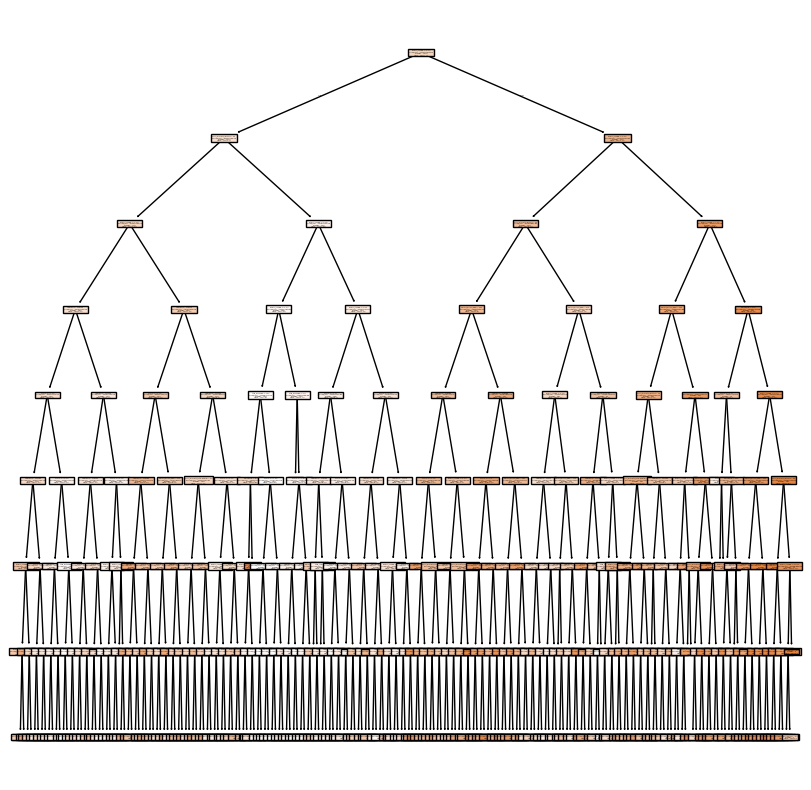

In [14]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(tree_1,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [40]:
path_tree = tree_1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path_tree.ccp_alphas, path_tree.impurities

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
clfs_tree = []

for ccp_alpha in ccp_alphas:
    clf_tree = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf_tree.fit(X_train, y_train)
    clfs_tree.append(clf_tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [22]:
tree_mse = [mean_squared_error(y_train, clf_tree.predict(X_train)) for clf_tree in clfs_tree]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

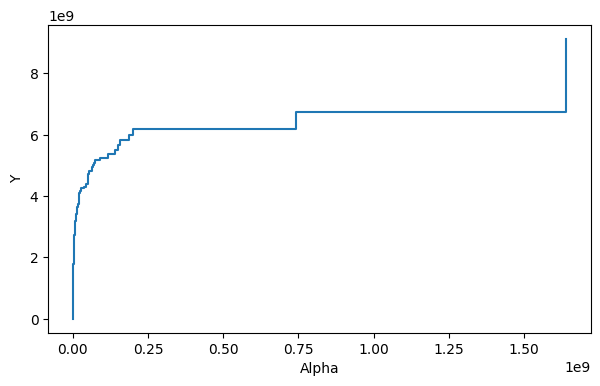

In [50]:
plt.figure(figsize=(7,4))
plt.plot(ccp_alphas[:-1], tree_mse[:-1],
         label='alpha', drawstyle='steps-post')
plt.xlabel('Alpha')
plt.ylabel('Y')
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [62]:
clf_tree = DecisionTreeRegressor(random_state=0)
clf_tree.fit(X_train, y_train)
print("R² its", clf_tree.score(X_train, y_train))

R² its 1.0


### 7. Visualize esta árvore.

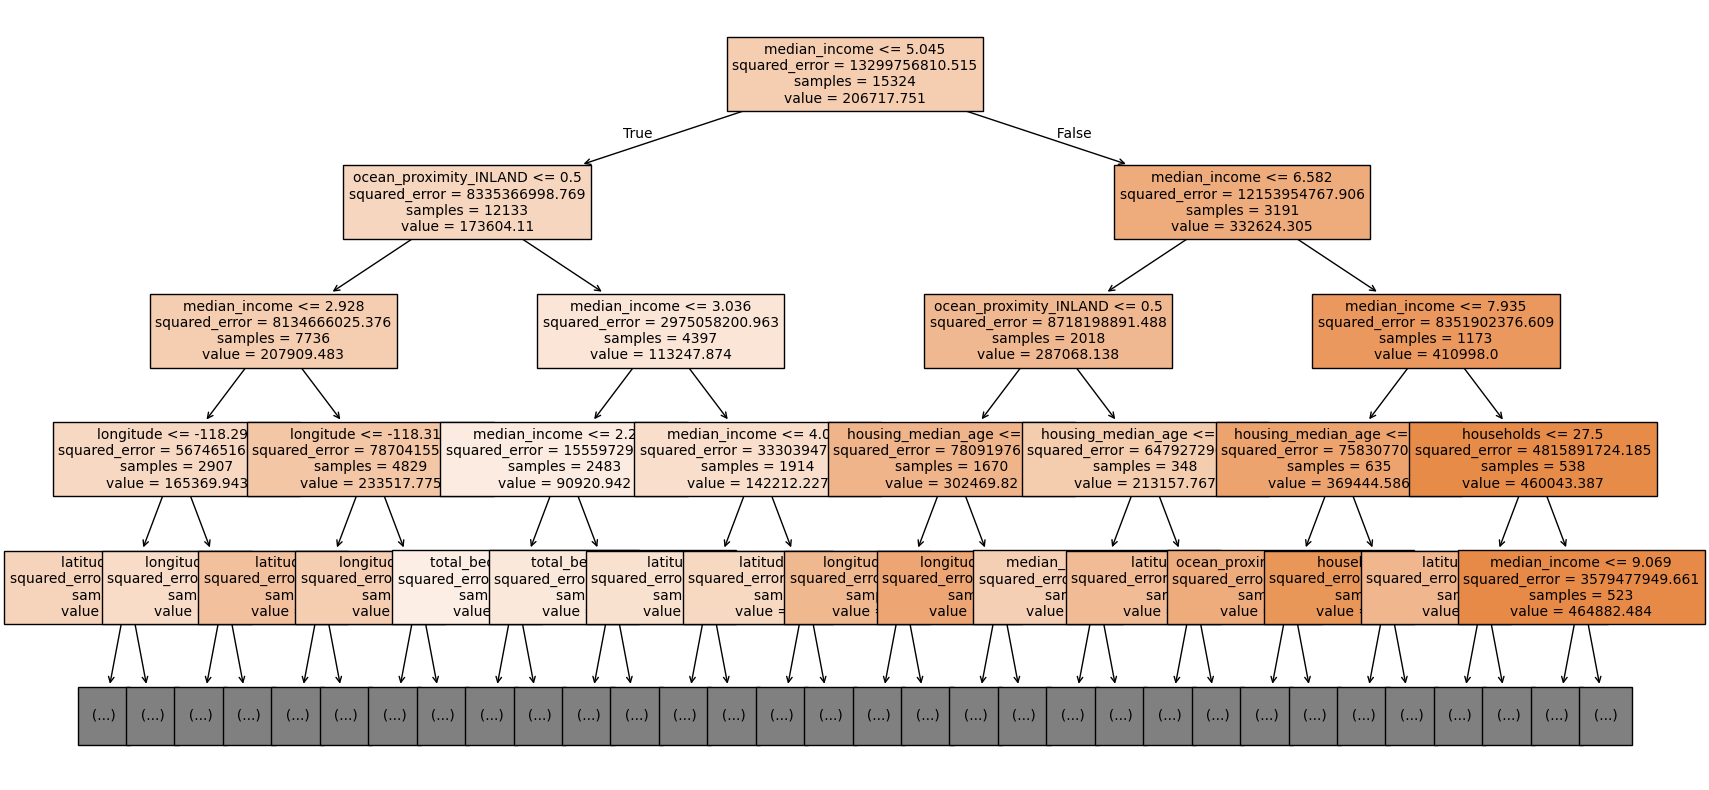

In [79]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_tree,
               feature_names=X.columns,
               filled=True,
               max_depth=4,
               fontsize=10)

plt.show()